# Query PTA

In [3]:
!git clone https://github.com/PatristicTextArchive/analyse_data

Cloning into 'analyse_data'...
remote: Enumerating objects: 21, done.
remote: Total 21 (delta 0), reused 0 (delta 0), pack-reused 21 (from 1)
Receiving objects: 100% (21/21), 67.31 MiB | 38.94 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [5]:
%pip install /content/analyse_data/assets/grc_proiel_sm-3.7-py3-none-any.whl

Processing ./analyse_data/assets/grc_proiel_sm-3.7-py3-none-any.whl


In [6]:
import re,json,os
import requests
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import spacy
from spacy import displacy
import numpy as np
from sklearn.decomposition import PCA
from collections import defaultdict

## PTA add plaintext data

(This was generated with another script and exported to a CSV file.)

In [7]:
df = pd.read_csv('/content/analyse_data/data/severian_plaintext.csv')


In [8]:
df

,urn,lang,text
0,pta0001.pta001.pta-MsAb,Ms,Τοῦ αὐτοῦ ὁμιλία εἰς τὸν περι φύσεως νό μον· κ...
1,pta0001.pta001.pta-MsAe,Ms,Τοῦ ἐν ἁγίοις πατρὸς ἡμῶν ἰωάννου τοῦ χρυσοστό...
2,pta0001.pta001.pta-MsAp,Ms,Τοῦ αὐτοῦ ὁμιλία εἰς τὸν περὶ φύσεως νόμον λόγ...
3,pta0001.pta001.pta-MsAv,Ms,Τοῦ αὐτοῦ εἰς τὸν περὶ φύσεως νόμον πᾶσα γραφὴ...
4,pta0001.pta001.pta-MsBe,Ms,Τοῦ αὐτοῦ ἁγίου ἰωάννου τοῦ χρυσοστόμου. λόγος...
...,...,...,...
206,pta0001.pta066.pta-xcl1,xcl,"Երանելոյն Սեբերիանոսի խօսք վասն Զատկի, Կաթարիս..."
207,pta0001.pta067.pta-xcl1,xcl,Նորին երանելոյն Սեբերիանոսի Եմեսու եպիսկոպոսի ...
208,pta0001.pta068.pta-xcl1,xcl,Նորին ասացեալ 'ի սուրբ վկայն յԱկակ մարտիրոս: Ո...
209,pta0001.pta069.pta-xcl1,xcl,Սբյն Սեւերիանոսի Եմեսու եպիսկոպոսի 'ի գալուստ ...


In [9]:
select = df.loc[df['urn'] == 'pta0001.pta003.pta-grc1', 'text']

In [10]:
selected_data = "".join(select.values)

## Dictionary queries with the [Classical Language Dictionary (CLD)](https://cld.bbaw.de)

In [11]:
def dictionary_wrapper(lemma,lang):
    URL = "https://cld.bbaw.de/api/dictionary/lemma/"+lemma
    PARAMS = {'language': lang, 'options': 'regex'}
    r = requests.get(url = URL, params = PARAMS)
    data = r.json()
    return data

In [12]:
dictentry= dictionary_wrapper("ἀδελφός", "grc")

In [13]:
print(dictentry["data"])

[{'lemma': 'ἀδελφός', 'meanings': 1, 'language': 'grc', 'descriptions': [{'dictionary': 'Bailly', 'reference': "Bailly 2020 Hugo Chávez Gérard Gréco, André Charbonnet, Mark De Wilde, Bernard Maréchal & contributeurs / Licence Creative Commons Attribution - Pas d'Utilisation Commerciale - Pas de Modification — « CC BY-NC-ND 4.0 »", 'source': 'https://bailly.app/%C3%A0-propos', 'description': "'<b>οῦ (ὁ)</b> <font color='purple'>[ᾰ]</font><br/><b>A</b> <i>subst.\xa0:</i><br/><b>\xa0\xa0\xa0I</b> <i>pr</i>. frère, ATT. <i>etc.\xa0; au pl</i>. ἀδελφοί, frères, ATT.\xa0; <i>qqf</i>. frère et sœur, EUR. <i>El. 536\xa0;</i> ἀδελφεοὶ (<i>ion</i>.) ἀπ' ἀμφοτέρων, HDT. <i>7, 97,</i> frères de père et de mère\xa0;<br/><b>\xa0\xa0\xa0II</b> <i>p. anal</i>. frère\xa0:<br/><b>\xa0\xa0\xa0\xa0\xa0\xa01</b> <i>en parl. d’un parent en gén</i>. SPT. <i>Gen. 13, 8\xa0; Job 42, 11, etc.\xa0;</i><br/><b>\xa0\xa0\xa0\xa0\xa0\xa02</b> <i>homme de la même nation ou de la même tribu,</i> SPT. <i>Ex. 2, 11\xa0;

In [14]:
for dictionary in dictentry["data"][0]["descriptions"]:
    print(dictionary["dictionary"])
    display(HTML(dictionary["description"]))

Bailly


LSJ


Pape


TBESG


## Analyse a text with the help of [greCy](https://github.com/jmyerston/greCy)

For better results use "grc_proiel_lg" or "grc_proiel_trf" (no named entities recognized)/"grc_ner_trf" (named entities recognizer)

In [16]:
nlp = spacy.load("grc_proiel_sm")

In [17]:
doc = nlp(selected_data)

In [18]:
info = []
for token in doc:
    data = {}
    data["id"] = token.i
    data["text"] = token.text
    data["lemma"] = token.lemma_
    data["entity"] = token.ent_type_
    data["pos"] = token.pos_
    data["tag"] = token.tag_
    data["morph"] = token.morph
    data["dep"] = token.dep_
    data["head_id"] = token.head.i
    data["stopword"] = token.is_stop
    data["sent_start"] = token.is_sent_start
    data["sent_end"] = token.is_sent_end
    data["vector"] = token.vector
    info.append(data)

In [19]:
analyzed = pd.DataFrame(info)


In [20]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
display(analyzed)

,id,text,lemma,entity,pos,tag,morph,dep,head_id,stopword,sent_start,sent_end,vector
0,0,Τοῦ,ὁ,,DET,S-,"(Case=Gen, Definite=Def, Gender=Masc, Number=S...",det,1,True,True,False,"[1.4701184, 0.82047135, -2.7751524, 0.8614368,..."
1,1,ἑν,ἑν,,PROPN,Ne,"(Case=Gen, Gender=Masc, Number=Sing)",nmod,33,False,False,False,"[-0.16279072, -0.08065433, 5.555133, 1.4236847..."
2,2,ἁγίοις,ἅγιος,,ADJ,A-,"(Case=Dat, Degree=Pos, Gender=Masc, Number=Plur)",amod,3,False,False,False,"[-0.7154563, 1.8660123, -0.57662785, -3.075590..."
3,3,πατρὸς,πατήρ,,NOUN,Nb,"(Case=Gen, Gender=Masc, Number=Sing)",appos,1,False,False,False,"[1.377928, 3.214761, -3.9851544, 0.7782781, -2..."
4,4,ἡμῶν,ἡμεῖς,,PRON,Pp,"(Case=Gen, Gender=Fem, Gender=Masc, Number=Plu...",det,3,True,False,False,"[-0.28159648, 1.5658678, 0.71779346, -3.182374..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061,12061,τῶν,ὁ,,DET,S-,"(Case=Gen, Definite=Def, Number=Plur, PronType...",det,12062,True,False,False,"[1.148988, -0.07279509, -0.15457124, -1.829469..."
12062,12062,αἰώνων,αἰών,,NOUN,Nb,"(Case=Gen, Gender=Masc, Number=Plur)",nmod,12060,False,False,False,"[1.5233289, 0.9982948, -1.047804, -0.28499597,..."
12063,12063,.,.,,PUNCT,Z,(),punct,11994,False,False,True,"[-2.0198188, -1.473855, 1.1692113, 2.2853432, ..."
12064,12064,Ἀμήν,Ἀμήν,,INTJ,I-,(),ROOT,12064,False,True,False,"[-1.4028566, 1.8401299, -3.4115763, 1.741468, ..."


### Simple questions answered using the analysis

#### What are the most used words in the text?

without stop words

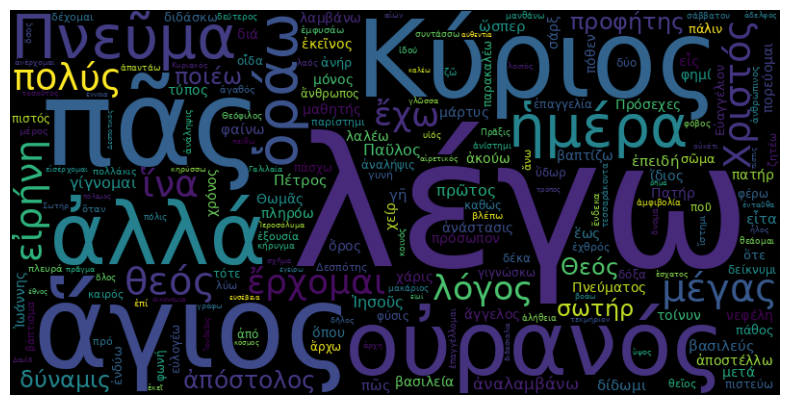

In [23]:
words = [token.lemma_
        for token in doc
        if not token.is_stop and not token.is_punct]

word_counts = Counter(words)

wordcloud = WordCloud(width=800, height=400, font_path='/content/analyse_data/data/DejaVuSans.ttf').generate_from_frequencies(dict(word_counts))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


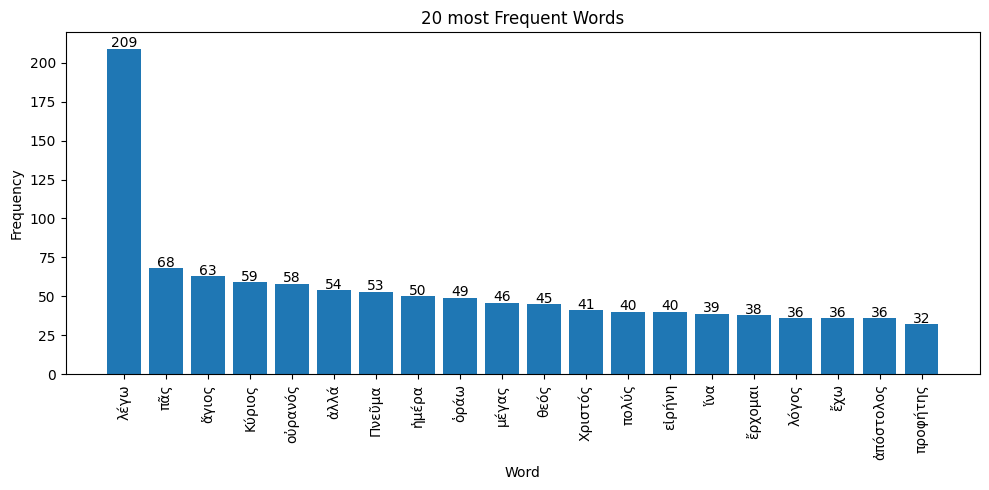

In [24]:
most_frequent_words = word_counts.most_common(20)
words, frequencies = zip(*most_frequent_words)

# Plot the most frequent words
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('20 most Frequent Words')
plt.xticks(rotation=90)

# Add the number of mentions to each bar
for i, freq in enumerate(frequencies):
    plt.text(i, freq + 1, str(freq), ha='center')

plt.tight_layout()
plt.show()

#### Are there named entities in the text?

better use "grc_ner_trf" for this!

> ![WARNING]
> With grc_proiel_sm NER is erroneous!

##### Highlight named entities in the text

In [25]:
displacy.render(doc, style = "ent")

##### Show named entities as stacked bars

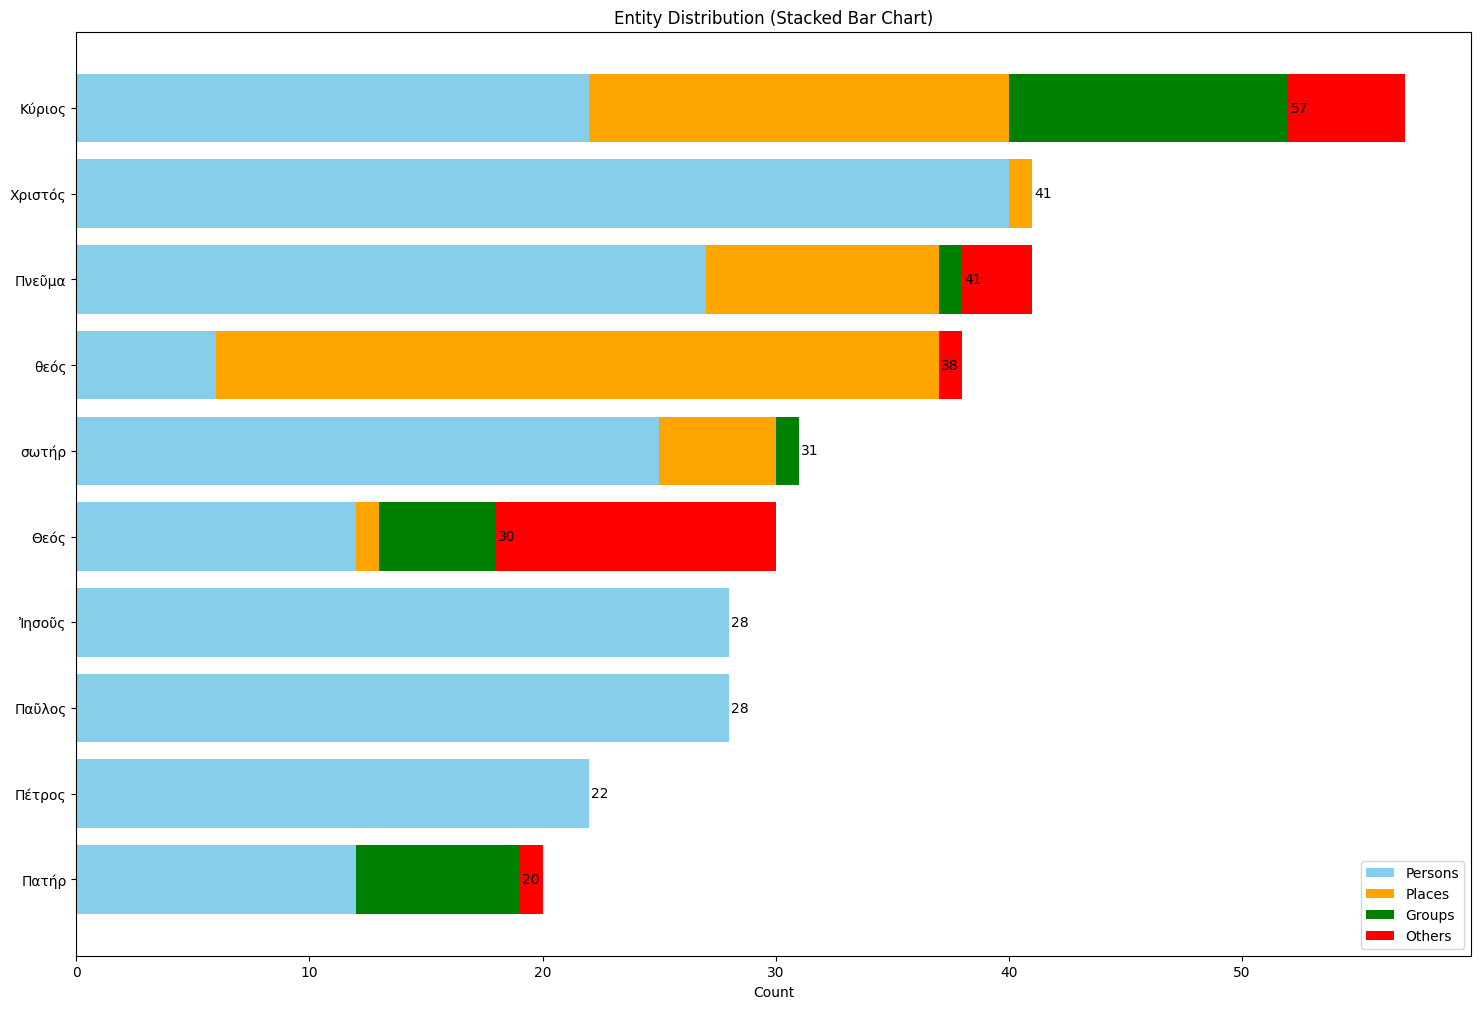

In [26]:
# Function to extract entities and count their occurrences
def extract_and_count_entities(doc, entity_types):
    """Extracts entities of specified types from a doc and counts their occurrences."""
    entity_counts = Counter()
    for token in doc:
        if token.ent_type_ in entity_types:
            entity_counts[token.lemma_] += 1
    return entity_counts

# Function to create a bar chart with annotations
def plot_entity_distribution(entity_counts, title, ax):
    """Plots the distribution of entities in a bar chart on a given axis."""
    names, counts = zip(*entity_counts.most_common(10))

    bars = ax.barh(names, counts, color='skyblue')

    # Add count annotations
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                 str(int(width)), ha='left', va='center')

    ax.set_xlabel('Count')
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the highest count on top

# Define entity types for each category
entity_types_persons = ["PERSON"]
entity_types_places = ["LOC", "GPE"]
entity_types_groups = ["NORP"]
entity_types_other = ["GOD"]

# Extract entities and count their occurrences
person_counts = extract_and_count_entities(doc, entity_types_persons)
place_counts = extract_and_count_entities(doc, entity_types_places)
group_counts = extract_and_count_entities(doc, entity_types_groups)
other_counts = extract_and_count_entities(doc, entity_types_other)

# Combine counts into a single dictionary and sort by count in descending order
combined_counts = defaultdict(int)
for name, count in person_counts.items():
    combined_counts[name] += count
for name, count in place_counts.items():
    combined_counts[name] += count
for name, count in group_counts.items():
    combined_counts[name] += count
for name, count in other_counts.items():
    combined_counts[name] += count

sorted_combined_counts = sorted(combined_counts.items(), key=lambda x: x[1], reverse=True)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(18, 12))

# Extract the top 10 from the combined counts and sum their counts
names, counts_persons, counts_places, counts_groups, counts_other = [], [], [], [], []
for name, count in sorted_combined_counts[:10]:
    names.append(name)
    counts_persons.append(person_counts.get(name, 0))
    counts_places.append(place_counts.get(name, 0))
    counts_groups.append(group_counts.get(name, 0))
    counts_other.append(other_counts.get(name, 0))

# Plot the stacked bar chart
bottom = [0] * len(names)
ax.barh(names, counts_persons, label='Persons', color='skyblue')
ax.barh(names, counts_places, left=counts_persons, label='Places', color='orange')
ax.barh(names, counts_groups, left=[sum(x) for x in zip(counts_persons, counts_places)], label='Groups', color='green')
ax.barh(names, counts_other, left=[sum(x) for x in zip(counts_persons, counts_places, counts_groups)], label='Others', color='red')

# Add count annotations
for i, (name, person_count, place_count, group_count, other_count) in enumerate(zip(
    names, counts_persons, counts_places, counts_groups, counts_other
)):
    ax.text(sum([person_count, place_count, group_count]) + 0.1,
             i, str(int(person_count + place_count + group_count + other_count)),
             ha='left', va='center')

# Set labels and title
ax.set_xlabel('Count')
ax.set_title('Entity Distribution (Stacked Bar Chart)')
ax.legend()
plt.gca().invert_yaxis()
plt.show()

#### Which are the 10 most used verbs, nouns and adjectives?

In [28]:
nouns = []
adjectives = []
verbs = []
for token in doc:
    if not token.is_stop and token.pos_ == "NOUN":
        nouns.append(token.lemma_)
    if not token.is_stop and token.pos_ == "ADJ":
        adjectives.append(token.lemma_)
    if not token.is_stop  and token.pos_ == "VERB":
        verbs.append(token.lemma_)

print(Counter(verbs).most_common(10))
print(Counter(nouns).most_common(10))
print(Counter(adjectives).most_common(10))

[('λέγω', 207), ('ὁράω', 42), ('ἔρχομαι', 37), ('ἔχω', 36), ('ποιέω', 30), ('ἀναλαμβάνω', 30), ('γίγνομαι', 27), ('δίδωμι', 23), ('φαίνω', 22), ('ἀκούω', 18)]
[('οὐρανός', 58), ('ἡμέρα', 50), ('Πνεῦμα', 48), ('εἰρήνη', 40), ('θεός', 38), ('λόγος', 36), ('ἀπόστολος', 36), ('προφήτης', 32), ('δύναμις', 32), ('Κύριος', 28)]
[('ἅγιος', 62), ('μέγας', 45), ('πολύς', 40), ('πρῶτος', 28), ('πᾶς', 25), ('μόνος', 16), ('ἴδιος', 14), ('πιστός', 12), ('ἐχθρός', 10), ('ἀγαθός', 9)]


#### What combinations of substantives and adjectives are in the text?

For the abbreviations used for the dependency cf. https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf

In [29]:
# token.dep_ = amod und passendes token.head.i bzw. token.head.text
# prints out the lemma!
pairs = []
for token in doc:
    if not token.is_punct:
        if token.dep_ == "amod":
            #print(doc[token.i].similarity(doc[token.head.i]))
            pairs.append(token.lemma_+" "+token.head.lemma_)
counter = Counter(pairs)
for element, count in counter.most_common():
    print(f"{element:<25}: {count}x")

ἅγιος Πνεῦμα             : 22x
ἅγιος Πνεύματος          : 11x
μέγας προφήτης           : 8x
πολύς ἡμέρα              : 6x
πολύς τεκμήριον          : 4x
Γαλιλαῖος ἀνήρ           : 4x
ἅγιος ἀπόστολος          : 3x
ἀγαθός Διδάσκαλος        : 3x
ἴδιος ἐξουσία            : 3x
μέγας ἀρχιερεύς          : 3x
μέγας βασιλεύς           : 3x
ζωοποιός δύναμις         : 2x
ἄλλος γυνή               : 2x
μυστικός τράπεζα         : 2x
ἔσχατος ἡμέρα            : 2x
Δεσποτικός φωνή          : 2x
θεῖος γέννησις           : 2x
εὐγενής Ἄνθρωπος         : 2x
ἴδιος μισθός             : 2x
ἴδιος κόπος              : 2x
πολύς νεφέλη             : 2x
χειροποίης ἅγιος         : 2x
ἅγιος σῶμα               : 2x
μέγας Κύριος             : 2x
μέγας φῶς                : 2x
ἅγιος πατήρ              : 1x
αἰώνιος ζωή              : 1x
οὐράνιος σάλπιγξ         : 1x
σύμπας γῆ                : 1x
πολύς ὕδωρ               : 1x
βραχύς λόγος             : 1x
θεῖος διδασκαλία         : 1x
ἀνθρώπινος γλῶσσα        : 1x
μικρός ῥ

#### What does the text say about Jews and heretics?

We want to get all instances when Jew or heretic is in the nominative; we also want to get the verb that is used to describe their action.

In [30]:
# Jews and Haeretics
for token in doc:
    if token.lemma_ == "Ἰουδαῖος" and "Case=Nom" in token.morph: #and token.dep_ == "nsubj":
        print(token, token.head.text)
    if token.lemma_ == "αἱρετικός" and "Case=Nom" in token.morph:
        print(token, token.head.text)

αἱρετικοί Ἀκουέτωσαν
αἱρετικὸς συζητῇ
Ἰουδαῖοι πολίται
Ἰουδαῖοι φαντάζονται


#### Visualize the dependency parse

In [31]:
sentence_spans = list(doc.sents)
displacy.render(sentence_spans[:1], style="dep")

### Visualize embeddings using Principal Components Analysis (PTA)



using embeddings from Spacy model. TODO: train embeddings for PTA texts

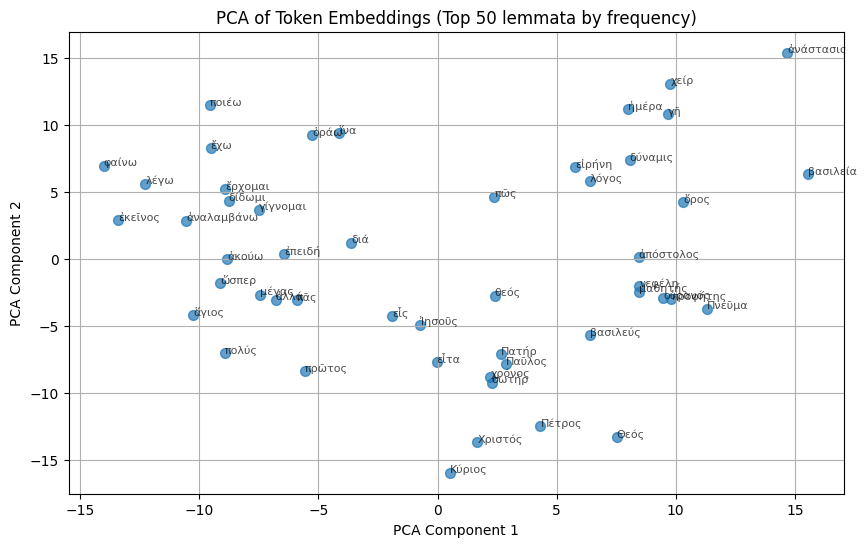

In [32]:
# Extract tokens and their frequencies using lemmas, excluding stop words and punctuation
filtered_tokens = [token for token in doc if token.has_vector and not token.is_stop and not token.is_punct]
token_frequencies = Counter(token.lemma_ for token in filtered_tokens)

# Limit the number of tokens to visualize (e.g., top 50 by frequency)
num_tokens_to_visualize = 50
most_common_tokens = token_frequencies.most_common(num_tokens_to_visualize)
selected_tokens = [token for token, _ in most_common_tokens]

# Create a mapping of lemma to its vector
lemma_to_vector = {token.lemma_: token.vector for token in filtered_tokens}

# Filter the embeddings for the selected lemmas
embeddings = np.array([lemma_to_vector[lemma] for lemma in selected_tokens if lemma in lemma_to_vector])

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=50, alpha=0.7)

# Annotate points with the corresponding lemmas
for i, lemma in enumerate(selected_tokens):
    if lemma in lemma_to_vector:  # Check if the lemma is in the mapping
        reduced_vector = pca.transform([lemma_to_vector[lemma]])
        plt.annotate(lemma, (reduced_vector[0, 0], reduced_vector[0, 1]), fontsize=8, alpha=0.7)

plt.title("PCA of Token Embeddings (Top 50 lemmata by frequency)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()